# Data Science Bootcamp - Project 4
Team Members:
* Ben Calderaio
* Conrad Urffer
* Clara Bucar
* Tammy Lacher
* Jeff Pinegar

Due Date: March 22, 2023

In [93]:
# imports
import warnings
warnings.filterwarnings('ignore')
import sqlalchemy
import psycopg2
from sqlalchemy import create_engine
from sql_config import protocol, username, password, host, port, database_name
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# create db connection and engine
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

# Load Data from PostgreSQL with clean code

In [94]:
df_clean = pd.read_sql_query('select * from si_info.vw_app_data_one_hot_target_r31', con=engine)

In [95]:
df_clean.head()

,target,amt_income_total,amt_credit,name_contract_type_Cash loans,name_contract_type_Revolving loans,code_gender_F,code_gender_M,flag_own_realty_N,flag_own_realty_Y,name_income_type_Working,...,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,0,31500.0,314055.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,225000.0,1125000.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,108000.0,247275.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,180000.0,225000.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,171000.0,555273.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


---
# Prepare for machine learning

In [96]:
X = df_clean

In [97]:
X.head()

,target,amt_income_total,amt_credit,name_contract_type_Cash loans,name_contract_type_Revolving loans,code_gender_F,code_gender_M,flag_own_realty_N,flag_own_realty_Y,name_income_type_Working,...,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,0,31500.0,314055.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,225000.0,1125000.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,108000.0,247275.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,180000.0,225000.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,171000.0,555273.0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


---
# Start model building

In [98]:
# Seperate out the dependent and independent variables
# Split our preprocessed data into our features and target arrays

# this is the target
y = X["target"].values

# Drop y out of the dataframe to get the independent variables
# this is the feature list
X = X.drop("target", axis=1)
independent_variables = X.columns
X.head()

,amt_income_total,amt_credit,name_contract_type_Cash loans,name_contract_type_Revolving loans,code_gender_F,code_gender_M,flag_own_realty_N,flag_own_realty_Y,name_income_type_Working,name_family_status_Married,...,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,31500.0,314055.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,225000.0,1125000.0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,108000.0,247275.0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180000.0,225000.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,171000.0,555273.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [99]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [100]:
target = y
target_names = ["no_risk", "risk"]

In [101]:
feature_names = X.columns
print(X.columns)
X

Index(['amt_income_total', 'amt_credit', 'name_contract_type_Cash loans',
       'name_contract_type_Revolving loans', 'code_gender_F', 'code_gender_M',
       'flag_own_realty_N', 'flag_own_realty_Y', 'name_income_type_Working',
       'name_family_status_Married', 'name_family_status_Separated',
       'name_family_status_Single / not married',
       'name_housing_type_Rented apartment', 'name_housing_type_With parents',
       'occupation_type_Accountants', 'occupation_type_Cleaning staff',
       'occupation_type_Cooking staff', 'occupation_type_Drivers',
       'occupation_type_HR staff', 'occupation_type_IT staff',
       'occupation_type_Laborers', 'occupation_type_Low-skill Laborers',
       'occupation_type_Managers', 'occupation_type_Medicine staff',
       'occupation_type_Private service staff',
       'occupation_type_Realty agents', 'occupation_type_Sales staff',
       'occupation_type_Secretaries', 'occupation_type_Security staff',
       'occupation_type_Waiters/barme

,amt_income_total,amt_credit,name_contract_type_Cash loans,name_contract_type_Revolving loans,code_gender_F,code_gender_M,flag_own_realty_N,flag_own_realty_Y,name_income_type_Working,name_family_status_Married,...,occupation_type_Laborers,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
0,31500.0,314055.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,225000.0,1125000.0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,108000.0,247275.0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180000.0,225000.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,171000.0,555273.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,112500.0,518562.0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
307501,117000.0,932643.0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
307502,99000.0,180000.0,0,1,0,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
307503,180000.0,1395000.0,1,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Random OverSample
### Split -> Fit -> Score

In [102]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=.7, random_state=31)
ros = RandomOverSampler(sampling_strategy=0.1)
X_train_ros,y_train_ros = ros.fit_resample(X_train,y_train)
# Support vector machine linear classifier
from sklearn.svm import LinearSVC,SVC
model = LinearSVC(random_state=0,tol=.001)
model.fit(X_train,y_train.ravel()) 

# print(f"Training Data Score: {classifier.score(X_train, y_train)}")
# print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

LinearSVC(random_state=0, tol=0.001)

In [103]:
# y_true = y_test
# y_pred = classifier.predict(X_test)
# confusion_matrix(y_true, y_pred)

# continue the evaluation of the model
y_true = y_test

# Predict  - using the model calculate results for the text data
y_pred = model.predict(X_test)

# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = tp / (tp + fp)
print(f'precision =  {precision}')
accuracy = (tp + tn)/(tp+tn+fp+fn)
print(f'accuracy =  {accuracy}')
sensitivity = tp / (tp + fn)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

True positives (TP): 1417
True negatives (TN): 179715
False positives (FP): 18140
False negatives (FN): 15982
precision =  0.07245487549215114
accuracy =  0.8414802976948164
sensitivity =  0.0814414621529973
F1 = 0.07668578850524949
              precision    recall  f1-score   support

           0       0.92      0.91      0.91    197855
           1       0.07      0.08      0.08     17399

    accuracy                           0.84    215254
   macro avg       0.50      0.49      0.49    215254
weighted avg       0.85      0.84      0.85    215254



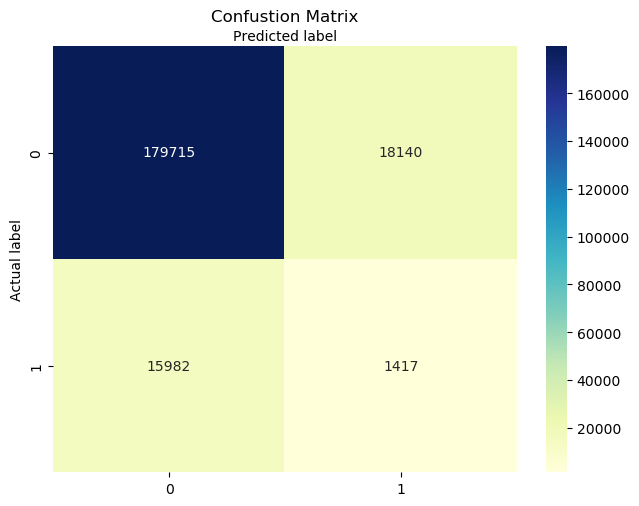

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confustion Matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [105]:
engine.dispose()